In [ ]:
"""
To check the progress of the neuron decomposition

"""

In [140]:
import minfig
du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


In [142]:
du = reload(du)
du.plot_decimated_mesh_with_somas(864691134026921572)

In [147]:
(schema.jobs & "table_name='__decomposition'" & "status='error'" & "error_message='Exception: The output from mesh_correspondence_adaptive_distance was nothing: curr_branch_face_correspondence'").fetch("key")


array([{'segment_id': 864691136973686300, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691136236687887, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691136108730040, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691135474742080, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691136031681723, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691135637979332, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691136723361277, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691135269775013, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691136237453372, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')},
       {'segment_id': 864691135986906115, 'decimation_v

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

# Checking the Decomposition Table

In [150]:
(schema.jobs & "table_name='__decomposition'" & "status='error'" & "key_hash='155f853ee9eab28fafe2e1ea78a9742a'").delete()

In [151]:
len(minnie.Decomposition())

259

In [129]:
minnie.Decomposition() & "n_vertices > 30000"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branche
864691134916168213,0,0.25,=BLOB=,82051,168317,1,1,0,1,1,19,19,93660.37693600099,93660.37693600099,2649.862,661.833,661.833,2369.039,2369.303,12,0.00012812248244740369,0.631578947368421,51246.415,13,nan,nan,261327626.16666666,20184729.833333332,2790.1620163800353,5099.43234403161,20102125.089743588
864691134917389578,0,0.25,=BLOB=,95336,193537,0,0,0,1,7,102,38,1662063.7254532604,721845.1474996195,12342.464,82.542,82.542,153.045,153.045,76,4.5726285241725065e-05,0.7450980392156863,94299.525,9,nan,nan,4995540308.888321,38759924.67667166,3005.62501448372,52975.24360688266,555060034.3209245
864691134917404170,0,0.25,=BLOB=,98753,214163,0,0,0,1,4,31,13,682041.9208604263,254598.99133995743,13851.677,254.692,239.693,488.614,488.614,283,0.0004149305069737985,9.129032258064516,439756.757,19,nan,nan,14042907890.870192,32631514.09166463,20589.508447155913,31933.353308020214,739100415.3089575
864691134947440636,0,0.25,=BLOB=,1671335,3386998,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,nan,nan,0.0,0.0,0.0,0.0,0.0
864691135012878486,0,0.25,=BLOB=,747726,1508367,0,0,0,1,7,500,444,13012412.69124955,10371252.853564715,17452.373,97.873,97.873,261.647,254.391,334,2.566779950228637e-05,0.668,3076725.072,73,nan,nan,10676871720.340714,18034979.565666832,820.5143791297508,3470.2066224592177,146258516.71699607
864691135081671415,0,0.25,=BLOB=,307439,637173,0,0,0,1,6,89,33,3318744.1884733248,1305370.6988906844,15024.506,185.545,185.545,467.876,426.509,856,0.00025792888857570356,9.617977528089888,2204038.005,42,nan,nan,59929423289.33286,53207874.59996796,18057.861614486577,27190.739521450705,1426891030.6984015
864691135099849760,0,0.25,=BLOB=,63599,139873,0,0,0,1,11,68,11,1074695.7633137559,212973.5481412246,10662.173,63.728,63.728,169.379,169.379,0,0.0,0.0,17175.38,5,nan,nan,0.0,0.0,0.0,0.0,0.0
864691135103985997,0,0.25,=BLOB=,119349,249486,0,0,0,1,3,33,13,921764.0556065388,507423.5389742956,11496.371,276.681,261.521,459.957,450.048,421,0.00045673293229358327,12.757575757575758,738622.968,19,nan,nan,34237952562.684376,45507014.72334798,37143.94410851173,46353.761047252425,1801997503.2991776
864691135122335271,0,0.25,=BLOB=,83778,173395,2,2,0,1,5,116,43,1733894.6681383038,613760.298283533,9723.156,74.445,74.445,191.145,191.145,1,5.76736302600035e-07,0.

In [121]:
neuron_obj = (minnie.Decomposition() & "segment_id=864691136903062706").fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [122]:
import neuron_visualizations as nviz
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                      #mesh_resolution="limb",
                      #skeleton_resolution="limb",
                      limb_branch_dict="all",
                     return_color_dict=True)
                  


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [ ]:
minnie.decompo

In [126]:
decimation_version = 0
decimation_ratio = 0.25

key_source =  ((minnie.Decimation).proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}" &  (minnie.BaylorSegmentCentroidExternal() & "multiplicity>0").proj())
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
864691134167328989,0,0.25
864691134221889045,0,0.25
864691134370328784,0,0.25
864691134384033872,0,0.25
864691134409056935,0,0.25
864691134412252598,0,0.25
864691134431433407,0,0.25
864691134434412977,0,0.25
864691134434464524,0,0.25
864691134437394197,0,0.25


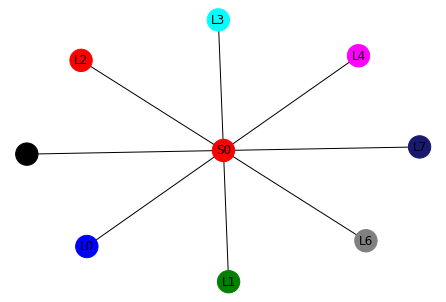

In [17]:
nviz.plot_soma_limb_concept_network(neuron_obj,node_colors=ret_col)

In [27]:
soma_mesh = main_mesh=neuron_obj["S0"].mesh

[<trimesh.Trimesh(vertices.shape=(661, 3), faces.shape=(933, 3))>,
 <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(72, 3))>,
 <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(70, 3))>,
 <trimesh.Trimesh(vertices.shape=(29, 3), faces.shape=(44, 3))>,
 <trimesh.Trimesh(vertices.shape=(25, 3), faces.shape=(40, 3))>,
 <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(32, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(36, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(19, 3))>,
 <trimesh.Trimesh(vertices.shape=(20, 3), faces.shape=(27, 3))>,
 <trimesh.Trimesh(vertices.shape=(19, 3), faces.shape=(34, 3))>,
 <trimesh.Trimesh(vertices.shape=(18, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(17, 3), faces.shape=(30, 3))>,
 <trimesh.Trimesh(vertices.shape=(17, 3), faces.shape=(26, 3))>,
 <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(21, 3))>,
 <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(28, 3))>,
 <trimesh.Trimesh(verti

In [73]:
import neuron
neuron = reload(neuron)
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [76]:
tu = reload(tu)

[<trimesh.Trimesh(vertices.shape=(13, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(13, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(12, 3), faces.shape=(20, 3))>,
 <trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(18, 3))>,
 <trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(18, 3))>,
 <trimesh.Trimesh(vertices.shape=(10, 3), faces.shape=(20, 3))>,
 <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(18, 3))>]

In [26]:
nviz.plot_objects(main_mesh=neuron_obj["S0"].mesh,
                meshes=neuron_obj.non_soma_touching_meshes,
                  meshes_colors="random")

In [20]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                      #mesh_resolution="limb",
                      #skeleton_resolution="limb",
                        mesh_soma=False,
                      limb_branch_dict=dict(L6="all"))
                  


 Working on visualization type: mesh

 Working on visualization type: skeleton
working on soma border vertices
Working on  new stand alone scatter points


In [11]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh
Working on  new stand alone scatter points


# Deleteing A lot of the Tables

In [139]:
"""
Pseudocode: 
Tables that need to be dropped:
-


"""

minnie.BaylorSegmentCentroidTest.drop()

`microns_minnie65_02`.`__baylor_segment_centroid_test` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [137]:
soma_path = Path("/mnt/dj-stor01/platinum/minnie65/02/somas/")

In [138]:
for j,f in enumerate(soma_path.iterdir()):
    if j > 100:
        break
    print(f)

In [136]:
from datajoint_utils import *
schema.external['somas'].delete(delete_external_files=True)

DataJointError: Storage somas is requested but not configured